In [68]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report as cr, confusion_matrix

In [3]:
nltk.download('stopwords')
Dataset = pd.read_csv('IMDB Dataset.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
Dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


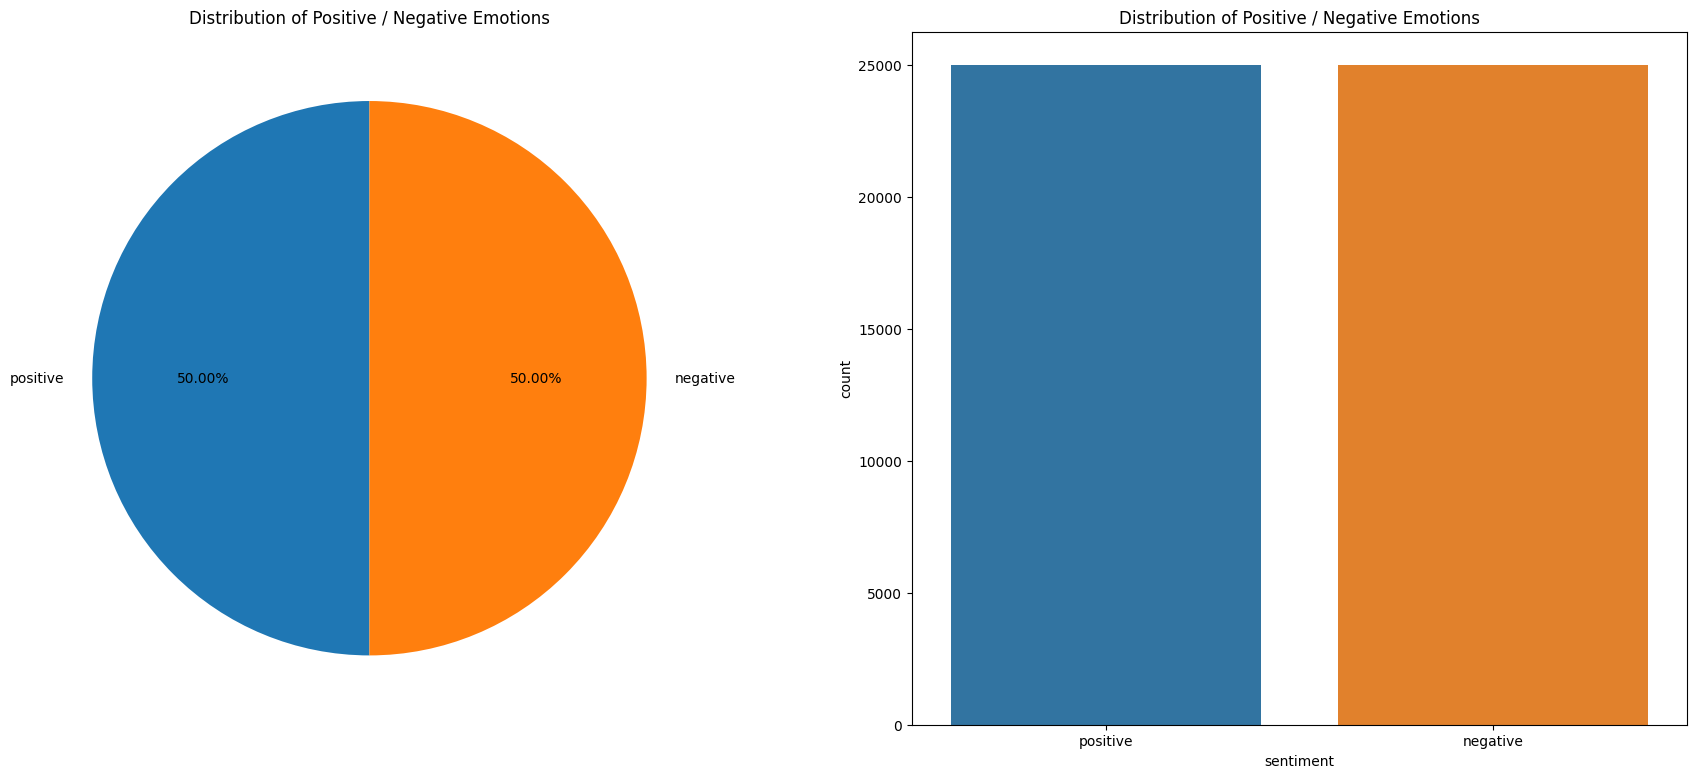

,sentiment
sentiment,
negative,25000
positive,25000


In [5]:
a, ax = plt.subplots(1,2,figsize=(22,9))
Dataset['sentiment'].value_counts().plot.pie(explode=[0,0], autopct='%1.2f%%',ax=ax[0], startangle=90)
ax[0].set_title('Distribution of Positive / Negative Emotions')
ax[0].set_ylabel('')
sns.countplot(x=Dataset['sentiment'])
ax[1].set_title('Distribution of Positive / Negative Emotions')
plt.show()
Dataset.groupby(['sentiment'])[['sentiment']].count()

In [6]:
le=LabelEncoder()
sentences=Dataset['review']
Dataset['sentiment']= le.fit_transform(Dataset['sentiment'])
review_positif=Dataset[Dataset['sentiment']==1]
review_negatif=Dataset[Dataset['sentiment']==0]
print("20 Sampel review positif\n".format(),review_positif[:20])
print("20 Sampel review negatif\n".format(),review_negatif[:20])

20 Sampel review positif
                                                review  sentiment
0   One of the other reviewers has mentioned that ...          1
1   A wonderful little production. <br /><br />The...          1
2   I thought this was a wonderful way to spend ti...          1
4   Petter Mattei's "Love in the Time of Money" is...          1
5   Probably my all-time favorite movie, a story o...          1
6   I sure would like to see a resurrection of a u...          1
9   If you like original gut wrenching laughter yo...          1
14  This a fantastic movie of three prisoners who ...          1
16  Some films just simply should not be remade. T...          1
18  I remember this film,it was the first film i h...          1
20  After the success of Die Hard and it's sequels...          1
22  What an absolutely stunning movie, if you have...          1
25  The Karen Carpenter Story shows a little more ...          1
26  "The Cell" is an exotic masterpiece, a dizzyin...          1

In [7]:
nltk_stop = set(stopwords.words('english'))
print(", ".join(nltk.stem.SnowballStemmer.languages))

arabic, danish, dutch, english, finnish, french, german, hungarian, italian, norwegian, porter, portuguese, romanian, russian, spanish, swedish


In [8]:
pd.set_option('display.max_colwidth', None)
Dataset.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [104]:
def find_in_stops(text):
    find = text
    copy_stop = list(nltk_stop.copy())
    print(copy_stop)
    print(len(copy_stop))
    if find in copy_stop:
        index = copy_stop.index(find)
        print("found it at", index)
    else:
        print("didnt find it")
find_in_stops("do")

['if', 'herself', 'there', 'so', 'did', 'below', "isn't", "won't", "couldn't", 'between', 'own', 'by', "hasn't", 'its', 'have', 'them', 'where', 'his', 'do', 'don', 'he', 'yourself', "should've", "didn't", 'above', 'whom', 'up', 'very', 'theirs', 'or', 'couldn', "doesn't", 'isn', 'too', "weren't", 'as', 'those', 'that', 'some', 'from', 'why', 'nor', 't', 'll', 'hasn', 'but', 'until', 'through', 's', 'against', 'ourselves', 've', 'which', 'does', "aren't", 'having', 'o', 'we', 'than', "haven't", 'other', 'an', 'i', 'was', 'had', 'who', 'to', "that'll", 'am', 'has', 'the', "wasn't", 'because', 'most', 'all', 'themselves', 'weren', 'doing', 'your', 'hers', 'when', 'again', 'y', 'are', 'won', 'being', 'what', 'm', "you're", 'you', 'out', 'during', 'both', 'in', 'her', 'after', 'more', 'd', 'only', 'of', 'him', 'each', 'not', 'needn', 'shouldn', 'should', 'been', "it's", 'and', 'about', 'hadn', 'doesn', 'a', 'then', 'down', 'can', 'mightn', "you'll", 'she', 'for', "don't", 'with', 'how', 'o

In [105]:
copy_dataset_token = Dataset.copy()
def remove_stopwords(text):
    tokenizer=nltk.ToktokTokenizer().tokenize
    tokens = tokenizer(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in nltk_stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Melakukan Tokenizer menggunakan toktoktokenizer
copy_dataset_token['review']=copy_dataset_token['review'].apply(remove_stopwords)

In [106]:
Dataset.head(1)


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [107]:
copy_dataset_token.head(1)

,review,sentiment
0,"One reviewers mentioned watching 1 Oz episode ' hooked. right , exactly happened me.<br / ><br / >The first thing struck Oz brutality unflinching scenes violence , set right word GO. Trust , show faint hearted timid. show pulls punches regards drugs , sex violence. hardcore , classic use word.<br / ><br / >It called OZ nickname given Oswald Maximum Security State Penitentary. focuses mainly Emerald City , experimental section prison cells glass fronts face inwards , privacy high agenda. Em City home many .. Aryans , Muslims , gangstas , Latinos , Christians , Italians , Irish .... scuffles , death stares , dodgy dealings shady agreements never far away.<br / ><br / >I would say main appeal show due fact goes shows ' dare. Forget pretty pictures painted mainstream audiences , forget charm , forget romance ... OZ ' mess around. first episode ever saw struck nasty surreal , ' say ready , watched , developed taste Oz , got accustomed high levels graphic violence. violence , injustice ( crooked guards ' sold nickel , inmates ' kill order get away , well mannered , middle class inmates turned prison bitches due lack street skills prison experience ) Watching Oz , may become comfortable uncomfortable viewing .... thats get touch darker side .",1


In [108]:
copy_dataset_clean = copy_dataset_token.copy()

def remove_html(text):
    html_tag=re.compile(r'<.*?>')
    text=html_tag.sub(r' ',text)
    return text

def remove_url(text):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    text=url_clean.sub(r' ',text)
    return text

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_punctuations(text):
    punct_tag=re.compile(r'[^\w\s]')
    text=punct_tag.sub(r' ',text)
    return text

def remove_emojis(text):
    emoji_clean = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
    text=emoji_clean.sub(r' ',text)
    return text

def cleaning_text(text):
    text = remove_emojis(text)
    text = remove_html(text)
    text = remove_url(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuations(text)
    return text

copy_dataset_clean['review']=copy_dataset_clean['review'].apply(cleaning_text)

In [109]:
copy_dataset_token.head(1)

,review,sentiment
0,"One reviewers mentioned watching 1 Oz episode ' hooked. right , exactly happened me.<br / ><br / >The first thing struck Oz brutality unflinching scenes violence , set right word GO. Trust , show faint hearted timid. show pulls punches regards drugs , sex violence. hardcore , classic use word.<br / ><br / >It called OZ nickname given Oswald Maximum Security State Penitentary. focuses mainly Emerald City , experimental section prison cells glass fronts face inwards , privacy high agenda. Em City home many .. Aryans , Muslims , gangstas , Latinos , Christians , Italians , Irish .... scuffles , death stares , dodgy dealings shady agreements never far away.<br / ><br / >I would say main appeal show due fact goes shows ' dare. Forget pretty pictures painted mainstream audiences , forget charm , forget romance ... OZ ' mess around. first episode ever saw struck nasty surreal , ' say ready , watched , developed taste Oz , got accustomed high levels graphic violence. violence , injustice ( crooked guards ' sold nickel , inmates ' kill order get away , well mannered , middle class inmates turned prison bitches due lack street skills prison experience ) Watching Oz , may become comfortable uncomfortable viewing .... thats get touch darker side .",1


In [110]:
copy_dataset_clean.head(1)

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode hooked right exactly happened me The first thing struck Oz brutality unflinching scenes violence set right word GO Trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word It called OZ nickname given Oswald Maximum Security State Penitentary focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home many Aryans Muslims gangstas Latinos Christians Italians Irish scuffles death stares dodgy dealings shady agreements never far away I would say main appeal show due fact goes shows dare Forget pretty pictures painted mainstream audiences forget charm forget romance OZ mess around first episode ever saw struck nasty surreal say ready watched developed taste Oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience Watching Oz may become comfortable uncomfortable viewing thats get touch darker side,1


In [111]:
copy_dataset_stem = copy_dataset_clean.copy()
def snowball_stem(text):
    ss = nltk.stem.SnowballStemmer(language="english")
    words_list=[ss.stem(word) for word in text.split()]
    text= ' '.join(words_list)
    return text
#Melakukan Stemming
copy_dataset_stem['review']=copy_dataset_stem['review'].apply(snowball_stem)

In [112]:
copy_dataset_clean.head(1)

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode hooked right exactly happened me The first thing struck Oz brutality unflinching scenes violence set right word GO Trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word It called OZ nickname given Oswald Maximum Security State Penitentary focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home many Aryans Muslims gangstas Latinos Christians Italians Irish scuffles death stares dodgy dealings shady agreements never far away I would say main appeal show due fact goes shows dare Forget pretty pictures painted mainstream audiences forget charm forget romance OZ mess around first episode ever saw struck nasty surreal say ready watched developed taste Oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience Watching Oz may become comfortable uncomfortable viewing thats get touch darker side,1


In [113]:
copy_dataset_stem.head(1)

,review,sentiment
0,one review mention watch 1 oz episod hook right exact happen me the first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word it call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away i would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side,1


In [114]:
x = copy_dataset_stem["review"]
y = copy_dataset_stem["sentiment"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(x_train)
X_test_vectorized = vectorizer.transform(x_test)

LR_TFID = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
LR_TFID.fit(X_train_vectorized, y_train)

LogisticRegression(C=1, max_iter=500, random_state=42)

Accuracy: 89.17 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



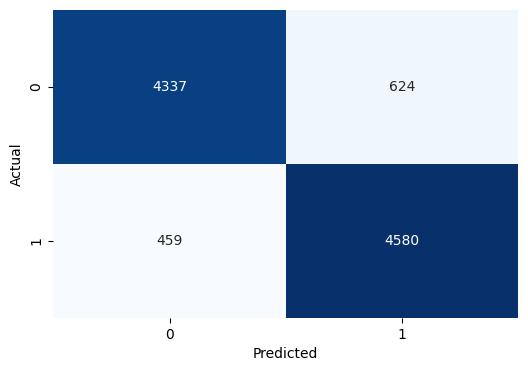

In [116]:
def evaluate(y_test, x_text_vector, model_used):
    model = model_used
    y_pred = model.predict(x_text_vector)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", str('{:.2f}'.format(accuracy*100))+" %")
    print("Classification Report:")
    print(cr(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate(y_test, X_test_vectorized, LR_TFID)

Accuracy: 89.29 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



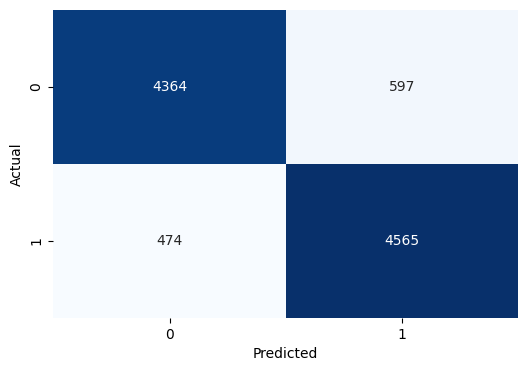

In [117]:
LSVC_TFID = LinearSVC()
LSVC_TFID.fit(X_train_vectorized, y_train)
evaluate(y_test, X_test_vectorized, LSVC_TFID)

Accuracy: 89.25 %
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4961
           1       0.88      0.92      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



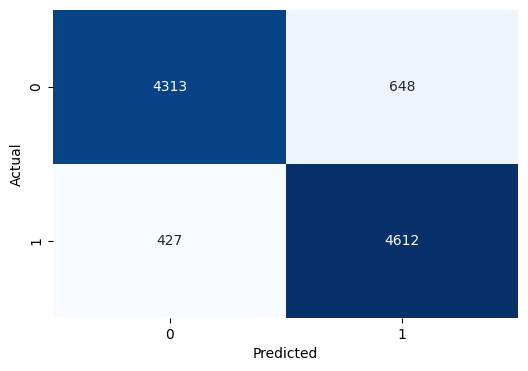

In [118]:
SGDC = SGDClassifier()
SGDC.fit(X_train_vectorized, y_train)
evaluate(y_test, X_test_vectorized, SGDC)

Accuracy: 86.14 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



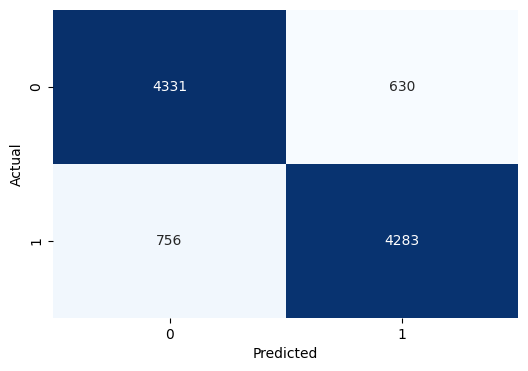

In [119]:
MNB_TFID = MultinomialNB()
MNB_TFID.fit(X_train_vectorized, y_train)
evaluate(y_test, X_test_vectorized, MNB_TFID)

Accuracy: 88.19 %
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



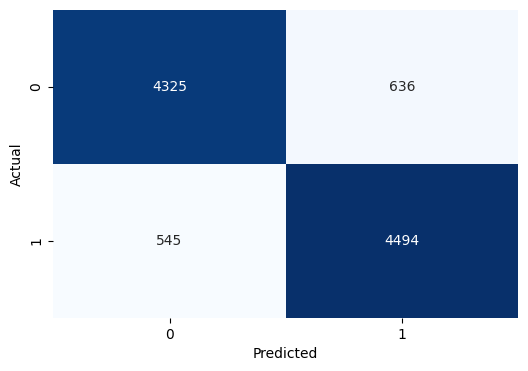

In [120]:
BOW_vectorizer = CountVectorizer()
BOW_X_train_vectorized = BOW_vectorizer.fit_transform(x_train)
BOW_X_test_vectorized = BOW_vectorizer.transform(x_test)

LR_BOW = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
LR_BOW.fit(BOW_X_train_vectorized, y_train)
evaluate(y_test, BOW_X_test_vectorized, LR_BOW)

Accuracy: 85.73 %
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



c:\Users\USER\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


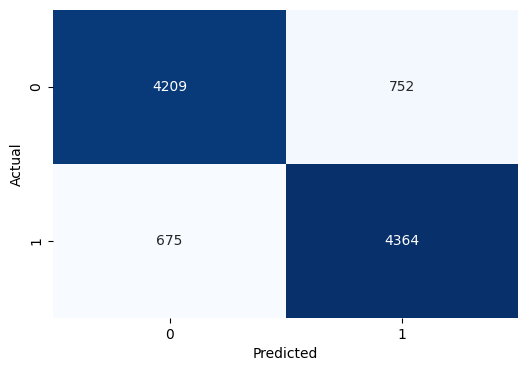

In [121]:
LSVC_BOW = LinearSVC()
LSVC_BOW.fit(BOW_X_train_vectorized, y_train)
evaluate(y_test, BOW_X_test_vectorized, LSVC_BOW)

Accuracy: 85.37 %
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4961
           1       0.87      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



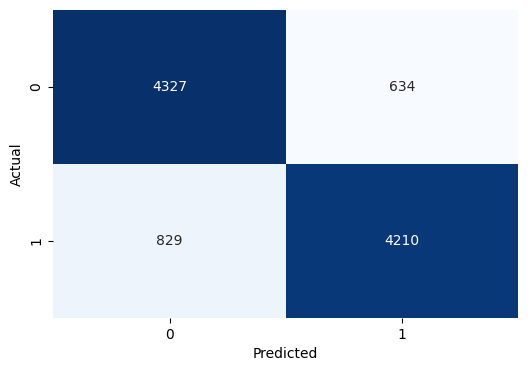

In [122]:
MNB_BOW = MultinomialNB()
MNB_BOW.fit(BOW_X_train_vectorized, y_train)
evaluate(y_test, BOW_X_test_vectorized, MNB_BOW)